In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import networkx as nx
import json
from shapely.geometry import LineString, MultiLineString
from shapely.ops import transform
from functools import partial
import pyproj
import geopandas as gp

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [4]:
n = nx.read_shp('shp/new-york.osm-line.dbf')

In [5]:
n

In [15]:
j = n.edges(data=True)[0][2]

In [24]:
json.loads(j['Json'])['coordinates']

[[-73.968134, 40.91077], [-73.967915, 40.910647], [-73.967099, 40.910183]]

In [35]:
line = LineString(json.loads(j['Json'])['coordinates'])

In [31]:
project = partial(
    pyproj.transform,
    pyproj.Proj(init='EPSG:4326'),
    pyproj.Proj(init='EPSG:32633'))

In [37]:
line = LineString(json.loads(j['Json'])['coordinates'])
transform(project, line).length

200.394122394725

In [34]:
line

0.0011898741974744821

In [42]:
n.edges(nbunch=[(-73.968134, 40.91077)], data=True)

[((-73.968134, 40.91077),
  (-73.967099, 40.910183),
  {'Json': '{ "type": "LineString", "coordinates": [ [ -73.968134, 40.91077 ], [ -73.967915, 40.910647 ], [ -73.967099, 40.910183 ] ] }',
   'ShpName': 'new-york.osm-line',
   'Wkb': b'\x00\x00\x00\x00\x02\x00\x00\x00\x03\xc0R}\xf5\xe8O\tS@Dt\x94\x1c\x82\x16\xc6\xc0R}\xf2Q\xc1\x93\xb4@Dt\x90\x14\xb5\x99\xaa\xc0R}\xe4\xf34?\xa3@Dt\x80\xe0e0\x06',
   'Wkt': 'LINESTRING (-73.968134 40.91077,-73.967915 40.910647,-73.967099 40.910183)',
   'access': None,
   'aerialway': None,
   'aeroway': None,
   'amenity': None,
   'area': None,
   'barrier': None,
   'bicycle': None,
   'boundary': None,
   'brand': None,
   'bridge': None,
   'building': None,
   'covered': None,
   'culvert': None,
   'cutting': None,
   'disused': None,
   'embankment': None,
   'foot': None,
   'harbour': None,
   'highway': 'tertiary',
   'historic': None,
   'horse': None,
   'junction': None,
   'landuse': None,
   'layer': None,
   'leisure': None,
   'lock':

In [40]:
n.nodes()[0]

(-73.968134, 40.91077)

In [48]:
n.edges(data=True)[173231]

((-74.291484, 40.367426),
 (-74.293159, 40.368613),
 {'Json': '{ "type": "LineString", "coordinates": [ [ -74.291484, 40.367426 ], [ -74.291565, 40.367622 ], [ -74.291663, 40.367782 ], [ -74.291704, 40.367865 ], [ -74.291792, 40.367913 ], [ -74.291863, 40.367941 ], [ -74.291985, 40.367987 ], [ -74.292258, 40.368073 ], [ -74.292363, 40.368115 ], [ -74.292434, 40.368149 ], [ -74.292564, 40.368229 ], [ -74.292632, 40.368283 ], [ -74.292716, 40.368358 ], [ -74.292939, 40.36857 ], [ -74.293036, 40.368552 ], [ -74.293089, 40.36856 ], [ -74.293134, 40.368583 ], [ -74.293159, 40.368613 ] ] }',
  'ShpName': 'new-york.osm-line',
  'Wkb': b'\x00\x00\x00\x00\x02\x00\x00\x00\x12\xc0R\x92\xa7\xac\x81\xd3\xaa@D/\x07\xd0\xae\xd9\x9d\xc0R\x92\xa9\x00>\xea!@D/\x0e<\xd9\xa5"\xc0R\x92\xaa\x9bI\x9d\x02@D/\x13{\x07\x07[\xc0R\x92\xabGA\x071@D/\x163H+\xe9\xc0R\x92\xac\xb8ZO\x01@D/\x17\xc5\xefb\xfa\xc0R\x92\xad\xe2%\xfaf@D/\x18\xb0\xd0\xed\xc4\xc0R\x92\xaf\xe1\xda{\x0b@D/\x1a2\xb1-4\xc0R\x92\xb4Z\xe5\xff\xa4@D

MemoryError: 

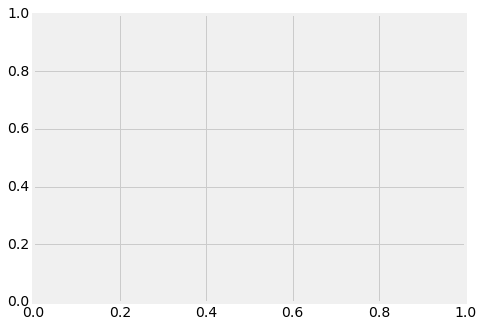

In [51]:
nx.draw(n)

In [78]:
start = (-73.9820716, 40.7787704) #n.nodes()[141345]
#start = (-73.9821771, 40.7781323)
start = (-73.9823238, 40.7739217)
walkspeed = 5 # kph
time = 10 # Minutes
#dist = 0 # meters

visted = []
to_visit = [(start, 0)] # node, dist at node

n.edges(nbunch=[start], data=True)

#line = LineString(json.loads(j['Json'])['coordinates'])
#transform(project, line).length

[((-73.9823238, 40.7739217),
  (-73.9822949, 40.7726333),
  {'Json': '{ "type": "LineString", "coordinates": [ [ -73.9823238, 40.7739217 ], [ -73.9823049, 40.7730986 ], [ -73.9822949, 40.7726333 ] ] }',
   'ShpName': 'new-york.osm-line',
   'Wkb': b'\x00\x00\x00\x00\x02\x00\x00\x00\x03\xc0R~\xded\xa4\xc5G@Dc\x0f\xdd\xc3\x95\x16\xc0R~\xde\x15_\x0c\xd6@Db\xf4\xe5\x19\xca\xac\xc0R~\xdd\xebm\xa1\xc4@Db\xe5\xa5\xe1\xa6y',
   'Wkt': 'LINESTRING (-73.9823238 40.7739217,-73.9823049 40.7730986,-73.9822949 40.7726333)',
   'access': None,
   'aerialway': None,
   'aeroway': None,
   'amenity': None,
   'area': None,
   'barrier': None,
   'bicycle': None,
   'boundary': None,
   'brand': None,
   'bridge': None,
   'building': None,
   'covered': None,
   'culvert': None,
   'cutting': None,
   'disused': None,
   'embankment': None,
   'foot': None,
   'harbour': None,
   'highway': 'primary',
   'historic': None,
   'horse': None,
   'junction': None,
   'landuse': None,
   'layer': None,
   '

In [71]:
for e in n.edges(data=True):
    if e and len(e) >= 3 and e[2]['name'] and 'Broadway' in e[2]['name']:
        print(e[0])

(-74.003097, 40.796534)
(-74.0167857, 40.7793154)
(-74.18525, 40.647918)
(-73.7264493, 40.696896)
(-73.9182294, 41.0909762)
(-73.9880635, 40.7490333)
(-73.570674, 40.643497)
(-74.285192, 41.00915)
(-73.9410885, 40.8391601)
(-73.9061212, 40.8770806)
(-73.9061212, 40.8770806)
(-73.941149, 40.7002809)
(-73.858626, 41.0853803)
(-73.8619483, 41.0895868)
(-73.9215288, 41.0778866)
(-73.8775411, 40.7369428)
(-73.8140729, 41.073475)
(-73.6640675, 40.584752)
(-73.5274848, 40.6694174)
(-73.7037299, 40.625109)
(-73.55802, 40.763537)
(-74.007052, 40.718269)
(-73.9361838, 40.7676918)
(-73.8623024, 41.0625432)
(-73.912168, 40.755764)
(-73.9376339, 40.8484381)
(-74.0015664, 40.7197848)
(-74.0015664, 40.7197848)
(-73.4611965, 40.7062484)
(-73.9207048, 41.0415594)
(-74.130235, 40.569839)
(-74.130235, 40.569839)
(-73.880349, 40.978017)
(-73.684085, 40.735022)
(-73.8624512, 41.0658213)
(-74.1409, 40.918196)
(-73.9907524, 40.734816)
(-73.9822732, 40.7714459)
(-73.688802, 40.685057)
(-73.7624574, 41.0304033

In [69]:
e

((-74.003097, 40.796534),
 (-74.001187, 40.798876),
 {'Json': '{ "type": "LineString", "coordinates": [ [ -74.003097, 40.796534 ], [ -74.002619, 40.797119 ], [ -74.002161, 40.797682 ], [ -74.001664, 40.7982919 ], [ -74.001187, 40.798876 ] ] }',
  'ShpName': 'new-york.osm-line',
  'Wkb': b'\x00\x00\x00\x00\x02\x00\x00\x00\x05\xc0R\x802\xbd\xc2m\xce@De\xf4\xd3|\x13w\xc0R\x80*\xe8\xe1\xd6I@Df\x07\xfe\xd2\x02\x97\xc0R\x80#g\xe4\x14\xe8@Df\x1aq\x9bM\xcf\xc0R\x80\x1bCRe(@Df.m\xd1\x94\xb3\xc0R\x80\x13r\xa3\x8b\x8b@DfA\x91\x9a\xc7\x97',
  'Wkt': 'LINESTRING (-74.003097 40.796534,-74.002619 40.797119,-74.002161 40.797682,-74.001664 40.7982919,-74.001187 40.798876)',
  'access': None,
  'aerialway': None,
  'aeroway': None,
  'amenity': None,
  'area': None,
  'barrier': None,
  'bicycle': None,
  'boundary': None,
  'brand': None,
  'bridge': None,
  'building': None,
  'covered': None,
  'culvert': None,
  'cutting': None,
  'disused': None,
  'embankment': None,
  'foot': None,
  'harbour': N

In [79]:
n2 = nx.read_shp('lionStreets/lionStreets.shp')

In [81]:
n2.nodes(data=True)[0]

((990173.0949912369, 177425.7124452591), {})

In [82]:
n2.edges(data=True)[0]

((990173.0949912369, 177425.7124452591),
 (990336.6641990095, 177105.22103002667),
 {'ArcCenterX': 0,
  'ArcCenterY': 0,
  'BOE_LGC': '1',
  'BikeLane': None,
  'BoroBndry': None,
  'Carto_Disp': None,
  'ConParity': None,
  'CurveFlag': None,
  'FCC': None,
  'FDNYID': None,
  'FaceCode': '8988',
  'FeatureTyp': '0',
  'FromLeft': 633,
  'FromRight': 624,
  'GenericID': 87013,
  'IncExFlag': None,
  'Join_ID': '3898801000000',
  'Json': '{ "type": "LineString", "coordinates": [ [ 990173.094991236925125, 177425.712445259094238 ], [ 990336.664199009537697, 177105.221030026674271 ] ] }',
  'LATOMICPOL': '129',
  'LAssmDist': '44',
  'LBlockFace': '1922609109',
  'LBoro': 3,
  'LCB2000': '1006',
  'LCB2000Suf': None,
  'LCB2010': '2006',
  'LCB2010Suf': None,
  'LCT1990': '502',
  'LCT1990Suf': '01',
  'LCT2000': '502',
  'LCT2000Suf': '01',
  'LCT2010': '1502',
  'LCT2010Suf': None,
  'LElectDist': '056',
  'LGC1': '01',
  'LGC2': None,
  'LGC3': None,
  'LGC4': None,
  'LGC5': None,
  '

In [83]:
#start = (-73.9820716, 40.7787704) #n.nodes()[141345]
start = n2.nodes()[560]
#start = (-73.9821771, 40.7781323)
#start = (-73.9823238, 40.7739217)
walkspeed = 16368 # ft/h
time = 10 # Minutes
#dist = 0 # meters

visted = []
to_visit = [(start, 0)] # node, dist at node

n2.edges(nbunch=[start], data=True)

#line = LineString(json.loads(j['Json'])['coordinates'])
#transform(project, line).length

[((1003126.1920064837, 192532.79806280136),
  (1003169.1578085274, 192501.3380613029),
  {'ArcCenterX': 0,
   'ArcCenterY': 0,
   'BOE_LGC': '1',
   'BikeLane': None,
   'BoroBndry': None,
   'Carto_Disp': None,
   'ConParity': None,
   'CurveFlag': None,
   'FCC': None,
   'FDNYID': None,
   'FaceCode': '0411',
   'FeatureTyp': '1',
   'FromLeft': 0,
   'FromRight': 0,
   'GenericID': 0,
   'IncExFlag': None,
   'Join_ID': '3041125010000',
   'Json': '{ "type": "LineString", "coordinates": [ [ 1003126.192006483674049, 192532.798062801361084 ], [ 1003169.157808527350426, 192501.338061302900314 ] ] }',
   'LATOMICPOL': '403',
   'LAssmDist': '54',
   'LBlockFace': None,
   'LBoro': 3,
   'LCB2000': '4002',
   'LCB2000Suf': None,
   'LCB2010': '2003',
   'LCB2010Suf': None,
   'LCT1990': '393',
   'LCT1990Suf': None,
   'LCT2000': '393',
   'LCT2000Suf': None,
   'LCT2010': '393',
   'LCT2010Suf': None,
   'LElectDist': '013',
   'LGC1': '25',
   'LGC2': '01',
   'LGC3': None,
   'LGC4':

In [84]:
n2.edges(data=True)[0]

((990173.0949912369, 177425.7124452591),
 (990336.6641990095, 177105.22103002667),
 {'ArcCenterX': 0,
  'ArcCenterY': 0,
  'BOE_LGC': '1',
  'BikeLane': None,
  'BoroBndry': None,
  'Carto_Disp': None,
  'ConParity': None,
  'CurveFlag': None,
  'FCC': None,
  'FDNYID': None,
  'FaceCode': '8988',
  'FeatureTyp': '0',
  'FromLeft': 633,
  'FromRight': 624,
  'GenericID': 87013,
  'IncExFlag': None,
  'Join_ID': '3898801000000',
  'Json': '{ "type": "LineString", "coordinates": [ [ 990173.094991236925125, 177425.712445259094238 ], [ 990336.664199009537697, 177105.221030026674271 ] ] }',
  'LATOMICPOL': '129',
  'LAssmDist': '44',
  'LBlockFace': '1922609109',
  'LBoro': 3,
  'LCB2000': '1006',
  'LCB2000Suf': None,
  'LCB2010': '2006',
  'LCB2010Suf': None,
  'LCT1990': '502',
  'LCT1990Suf': '01',
  'LCT2000': '502',
  'LCT2000Suf': '01',
  'LCT2010': '1502',
  'LCT2010Suf': None,
  'LElectDist': '056',
  'LGC1': '01',
  'LGC2': None,
  'LGC3': None,
  'LGC4': None,
  'LGC5': None,
  '

In [88]:
shp = gp.GeoDataFrame.from_file('lionStreets/lionStreets.shp')

In [94]:
shp.columns

Index(['ArcCenterX', 'ArcCenterY', 'BOE_LGC', 'BikeLane', 'BoroBndry',
       'Carto_Disp', 'ConParity', 'CurveFlag', 'FCC', 'FDNYID',
       ...
       'ToLeft', 'ToRight', 'TrafDir', 'TrafSrc', 'Twisted', 'XFrom', 'XTo',
       'YFrom', 'YTo', 'geometry'],
      dtype='object', length=114)

In [103]:
n = nx.Graph()
for r in shp[['NodeIDFrom', 'NodeIDTo', 'SHAPE_Leng', 'RW_TYPE', 'Street', 'geometry']].iterrows():
    n.add_edge(r[1]['NodeIDFrom'], r[1]['NodeIDTo'], attr_dict={
        'type': r[1]['RW_TYPE'],
        'len': r[1]['SHAPE_Leng'],
        'name': r[1]['Street'],
        'geo': r[1]['geometry']
    })
    #print(r[1]['NodeIDFrom'])
    #break

In [120]:
n.edges(nbunch=[n.nodes()[0]], data=True)[0][2]['type']

'1'

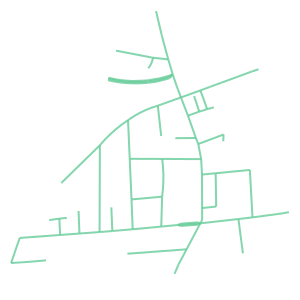

In [124]:
start = n.nodes()[560]
walkspeed = 16368 # ft/h
time = 10 # Minutes
dist = walkspeed * (time/60)

visited = []
queued = [start]
to_visit = [(start, 0)] # node, dist at node
lines = []

#n2.edges(nbunch=[start], data=True)

while to_visit:
    node,cur_dist = to_visit.pop()
    #visited.append(visited)
    edges = n.edges(nbunch=[node], data=True)
    for e in edges:
        if e[2]['type'] in ['1', '5', '6', '10']:
            if cur_dist + e[2]['len'] < dist:
                if e[2]['geo'] not in lines:
                    lines.append(e[2]['geo'])
                if e[1] not in queued:    
                    to_visit.append((e[1], cur_dist + e[2]['len']))
                    queued.append(e[1])
            

#line = LineString(json.loads(j['Json'])['coordinates'])
#transform(project, line).length

MultiLineString(lines)

In [127]:
from shapely.geometry import  mapping

In [129]:
mapping(MultiLineString(lines))

{'coordinates': (((923500.0906244367, 130516.84441719949),
   (923851.6055411398, 130548.5768187046)),
  ((923851.6055411398, 130548.5768187046),
   (923841.3104406446, 130204.91920238733)),
  ((923852.5275411755, 130981.87963929772),
   (923861.5138416141, 130895.56423519552),
   (923865.9364418238, 130808.710831061),
   (923865.7493418157, 130721.68662694097),
   (923860.9594415873, 130634.85282281041),
   (923851.6055411398, 130548.5768187046)),
  ((923852.5275411755, 130981.87963929772),
   (923479.4476234615, 130983.26743936539)),
  ((924299.8430624306, 130979.75363919139),
   (923852.5275411755, 130981.87963929772)),
  ((924309.6559628993, 130802.26383076608),
   (924299.8430624306, 130979.75363919139)),
  ((924299.8430624306, 130979.75363919139),
   (924266.9006608576, 131153.53034745157)),
  ((924266.9006608576, 131153.53034745157),
   (924556.861174643, 131262.09065259993)),
  ((924266.9006608576, 131153.53034745157),
   (924238.8129595369, 131222.5780507326)),
  ((924238.8129

In [131]:
n.nodes()[560]


'0001022'